# Kr analysis (run 4073)

# Notebook configuration

In [13]:
outputfolder  = "plots/"
save_plots    = False
inputfilename = "/Users/Gonzalo/github/NEXTdata/Bkg/dst_4073.root.h5"

In [2]:
import os
import functools
import textwrap
import time
import glob
print("Running on ", time.asctime())

import numpy             as np
import matplotlib.pyplot as plt

import invisible_cities.core.core_functions as coref
import invisible_cities.core.fit_functions  as fitf
import invisible_cities.reco.dst_functions  as dstf

pi = np.pi

coref = fitf

Running on  Wed May 24 20:26:34 2017


#### General plotting options

In [70]:
%matplotlib inline

plt.rcParams["figure.figsize"]          = 8, 6
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"
XR1Opt  = "k"
XR2Opt  = "c"

if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

#### Useful functions

In [4]:
def labels(xlabel, ylabel):
    """
    Set x and y labels.
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


def hist(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    return plt.hist(*args, **kwargs)


def doublehist(data1, data2, lbls, *args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    h1 = plt.hist(data1, *args, label=lbls[0], alpha=0.5, normed=True, **kwargs)
    h2 = plt.hist(data2, *args, label=lbls[1], alpha=0.5, normed=True, **kwargs)
    return h1, h2, plt.legend()

    
def hist2d(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    plt.figure()
    return plt.hist2d(*args, **kwargs)

    
def pdf(data, *args, **kwargs):
    """
    Create a normalized histogram with appropiate range.
    """
    data = np.array(data)
    h = hist(data, *args, **kwargs, weights=np.ones_like(data)/len(data))
    plt.yscale("log")
    plt.ylim(1e-4, 1.)
    return h
    
def scatter(*args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    return plt.scatter(*args, **kwargs)


def profile_and_scatter(x, y, z, nbin, *args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    x, y, z, ze = fitf.profileXY(x, y, z, *nbin, *args, **kwargs)
    x_ = np.repeat(x, x.size)
    y_ = np.tile  (y, y.size)
    z_ = z.flatten()
    return (x, y, z, ze), plt.scatter(x_, y_, c=z_, marker="s"), plt.colorbar()


def doublescatter(x1, y1, x2, y2, lbls, *args, **kwargs):
    """
    Create a figure and then a scatter plot
    """
    plt.figure()
    sc1 = plt.scatter(x1, y1, *args, label=lbls[0], **kwargs)
    sc2 = plt.scatter(x2, y2, *args, label=lbls[1], **kwargs)
    return sc1, sc2, plt.legend()

def covariance(x, y):
    cov = np.cov(x, y)
    l, v = np.linalg.eig(cov)
    lx, ly = l**0.5
    vx, vy = v.T
    x0, y0 = np.mean(x), np.mean(y)
    x1     = lx * vx[0]
    y1     = lx * vx[1]
    plt.arrow(x0, y0, x1, y1, head_width=0.1*ly, head_length=0.1*lx, fc='r', ec='r')
    x1     = ly * vy[0]
    y1     = ly * vy[1]
    plt.arrow(x0, y0, x1, y1, head_width=0.1*lx, head_length=0.1*ly, fc='r', ec='r')
    return l, v

def reso(values, ene=29.6):
    _, mu, sigma = values
    r = 235. * sigma/mu
    return r, r * (ene/2458)**0.5

def gausstext(values, ene=29.6):
    return textwrap.dedent("""
        $\mu$ = {:.1f}
        $\sigma$ = {:.2f}
        R = {:.3}%
        Rbb = {:.3}%""".format(*values[1:], *reso(values, ene)))

def save_to_folder(save_plots, outputfolder, name):
    """
    Set title and save plot in folder.
    """
    plt.title(name)
    if save_plots:
        plt.savefig("{}/{}.png".format(outputfolder, name), dpi=100)

save = functools.partial(save_to_folder, save_plots, outputfolder)

### Input data

In [14]:
ifile = os.path.expandvars(inputfilename)
print("ifile:", ifile)

ifile: /Users/Gonzalo/github/NEXTdata/Bkg/dst_4073.root.h5


# Read data

In [16]:
full = dstf.load_dst(ifile, "DST", "Events")
print(len(full))
full.head()

19885


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,1,1.495562e+09,0,1,225.0,7.338407,42.954826,210550.0,21.852500,1812.599243,...,654462.5,4,443.9125,443.9125,-55.182399,178.344556,186.686576,1.870868,6.343131,4.756829
1,6,1.495562e+09,0,1,225.0,2.455278,11.219690,515075.0,9.311250,2729.160645,...,652462.5,9,137.3875,137.3875,-107.541849,88.021408,138.971283,2.455681,7.036550,6.658811
2,7,1.495562e+09,0,2,300.0,8.711154,46.523208,152500.0,25.914250,2430.075928,...,655462.5,4,502.9625,502.9625,-49.948125,-30.740957,58.649993,-2.589885,5.045397,4.989958
3,7,1.495562e+09,1,2,300.0,8.711154,46.523208,152500.0,12.190938,1065.902466,...,673112.5,4,520.6125,520.6125,-102.014563,-111.868454,151.398554,-2.310156,4.601412,6.741718
4,8,1.495562e+09,0,1,225.0,8.427734,44.135537,552325.0,10.849875,3594.396484,...,652462.5,17,100.1375,100.1375,-46.744921,-196.489042,201.972847,-1.804356,8.664656,8.100768


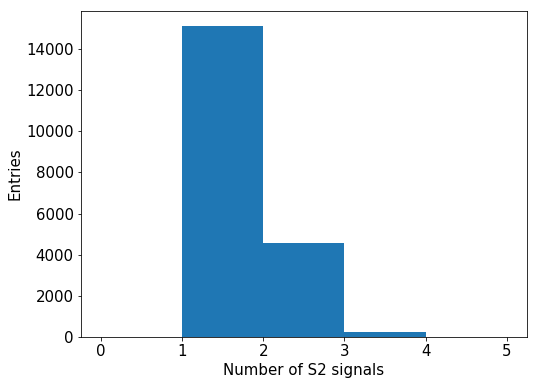

In [19]:
hist(full.nS2, 5, (0,5))
labels("Number of S2 signals", "Entries")

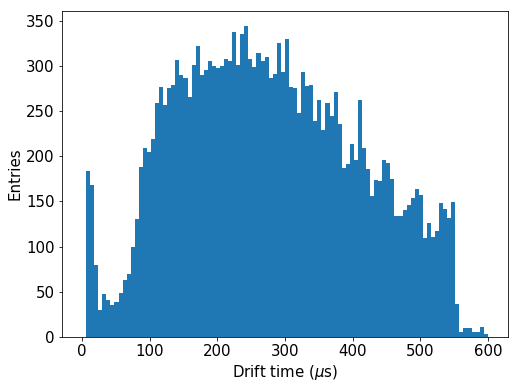

In [20]:
hist(full.Z, 100, (0,600))
labels("Drift time ($\mu$s)", "Entries")

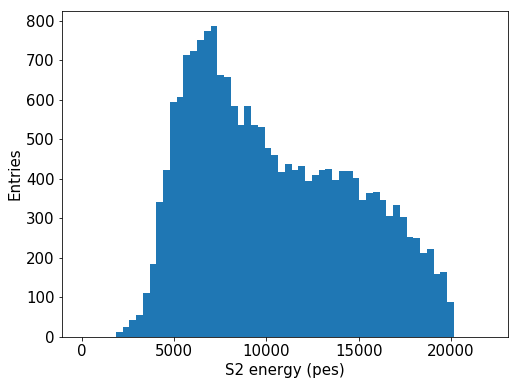

In [35]:
hist(full.S2e, 60, (0,22e3))
labels("S2 energy (pes)", "Entries")

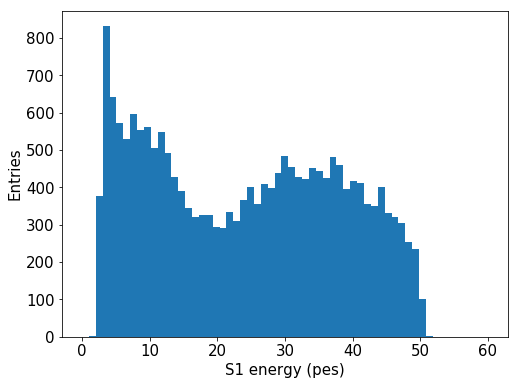

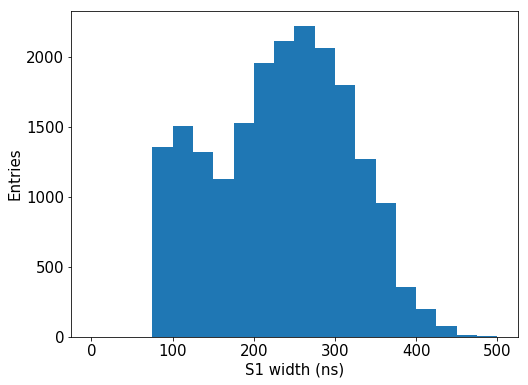

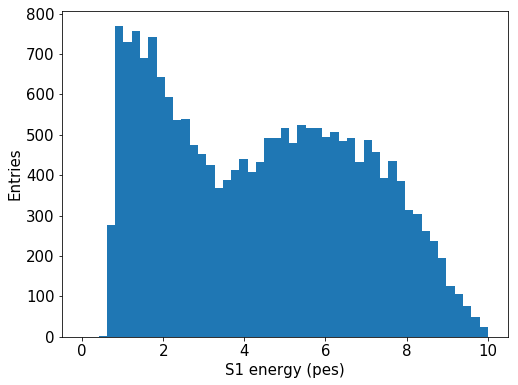

In [34]:
bins = np.linspace(0, 60, 60)
hist(full.S1e, bins)
labels("S1 energy (pes)", "Entries")

bins = np.linspace(0, 500, 21)
hist(full.S1w, bins)
labels("S1 width (ns)", "Entries")

bins = np.linspace(0, 10, 50)
hist(full.S1h, bins)
labels("S1 energy (pes)", "Entries")

# S2 energy vs Z

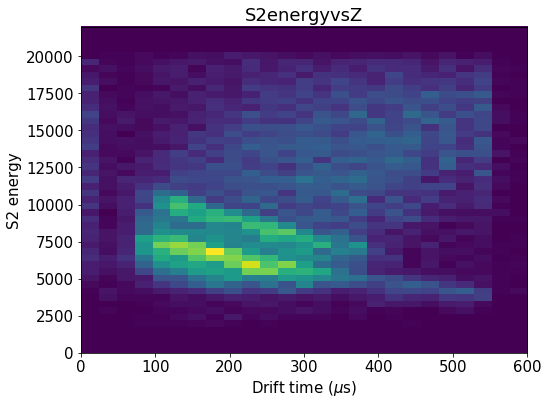

In [37]:
zrange = 0, 600
Erange = 0, 22e3
hist2d(full.Z, full.S2e, (25,  50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")
save("S2energyvsZ")

# S1 energy

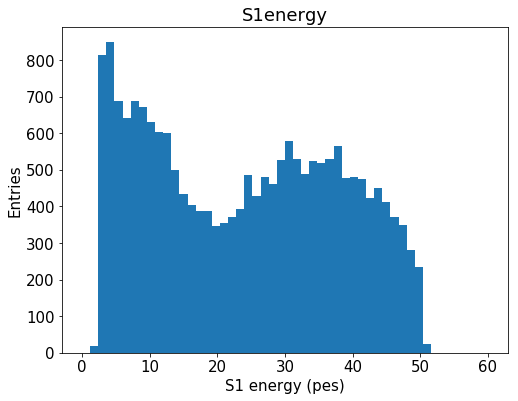

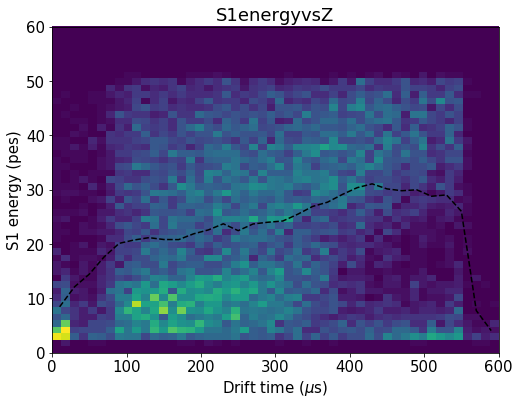

In [43]:
zrange = 0, 600
Srange = 0, 60

hist(full.S1e, 50, range=Srange)
labels("S1 energy (pes)", "Entries")
save("S1energy")

hist2d(full.Z, full.S1e, (50, 50), range=(zrange, Srange))
x, y, _ = fitf.profileX(full.Z, full.S1e, 30, xrange=zrange, yrange=Srange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1energyvsZ")

# S1 width

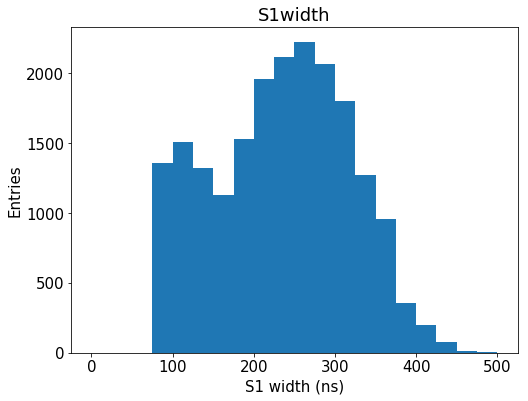

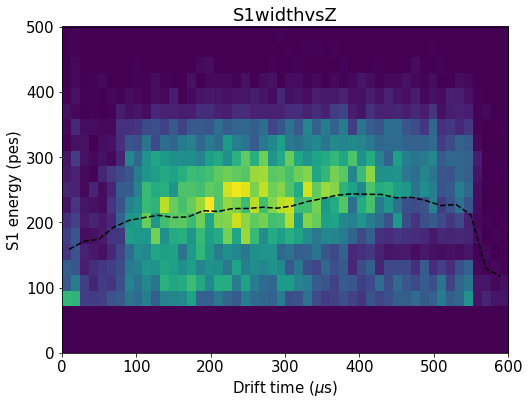

In [44]:
zrange = 0, 600
wrange = 0, 500

hist(full.S1w, np.linspace(*wrange, 21))
labels("S1 width (ns)", "Entries")
save("S1width")

hist2d(full.Z, full.S1w, (50, 21), range=(zrange, wrange))
x, y, _ = fitf.profileX(full.Z, full.S1w, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 energy (pes)")
save("S1widthvsZ")

# S1 height

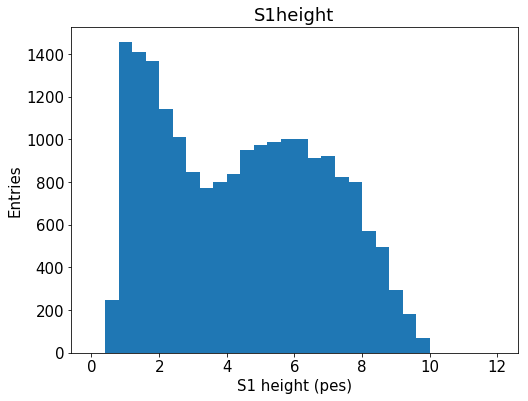

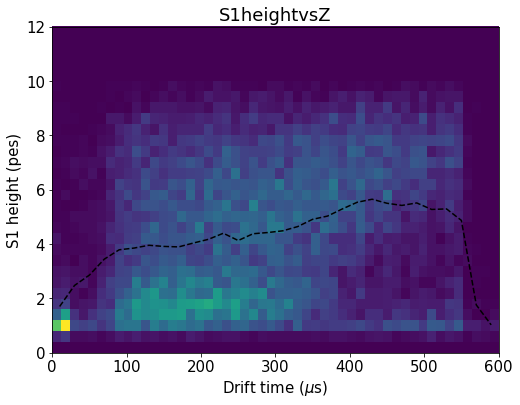

In [47]:
zrange = 0, 600
hrange = 0, 12

hist(full.S1h, 30, range=hrange)
labels("S1 height (pes)", "Entries")
save("S1height")

hist2d(full.Z, full.S1h, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(full.Z, full.S1h, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1 height (pes)")
save("S1heightvsZ")

# S1 peak to area ratio

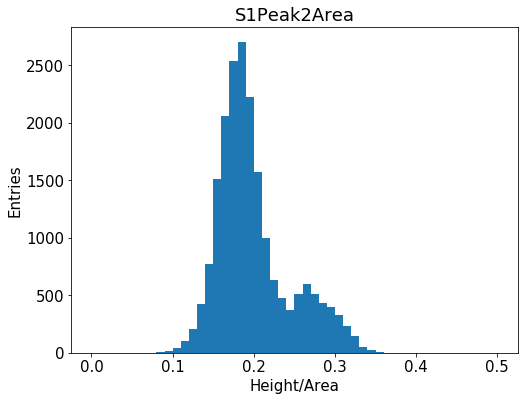

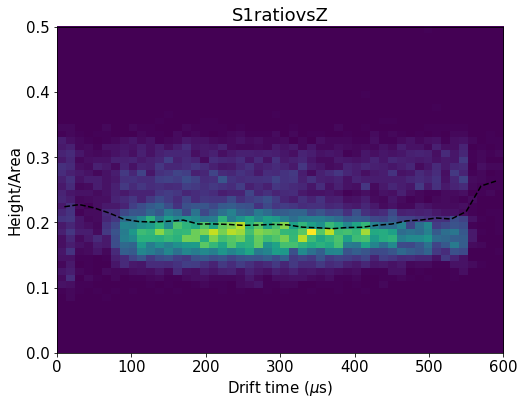

In [49]:
zrange = 0, 600
rrange = 0, 0.5

S1r = full.S1h/full.S1e
hist(S1r, 50, range=rrange)
labels("Height/Area", "Entries")
save("S1Peak2Area")

hist2d(full.Z, S1r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(full.Z, S1r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "Height/Area")
save("S1ratiovsZ")

# S2 energy

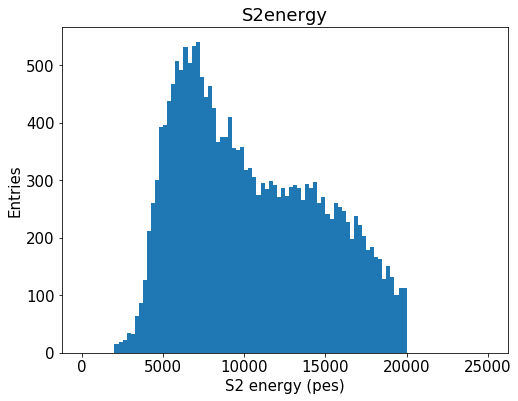

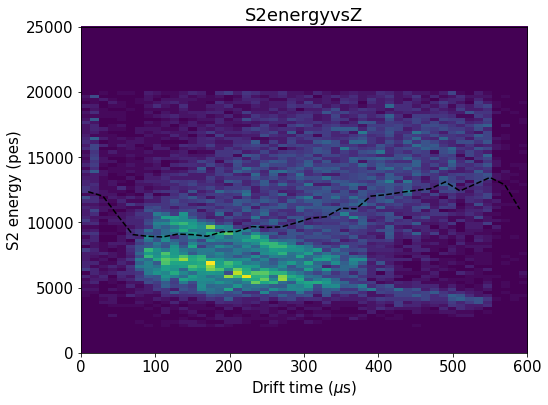

In [52]:
zrange = 0, 600
Erange = 0, 25e3

hist(full.S2e, 100, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy")

hist2d(full.Z, full.S2e, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(full.Z, full.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ")

# S2 width

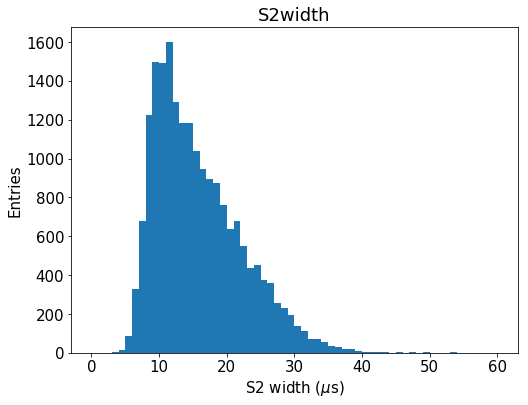

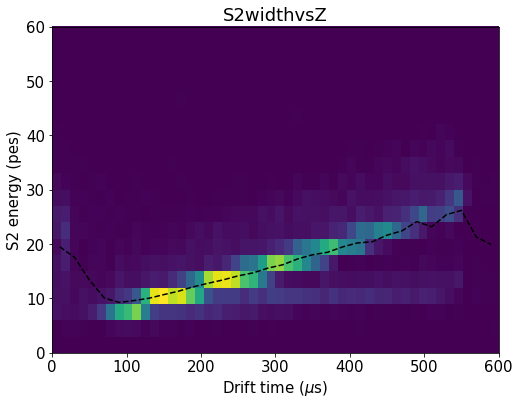

In [55]:
zrange = 0, 600
wrange = 0, 60

hist(full.S2w, 60, range=wrange)
labels("S2 width ($\mu$s)", "Entries")
save("S2width")

hist2d(full.Z, full.S2w, (50, 20), range=(zrange, wrange))
x, y, _ = fitf.profileX(full.Z, full.S2w, 30, xrange=zrange, yrange=wrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2widthvsZ")

# S2 height

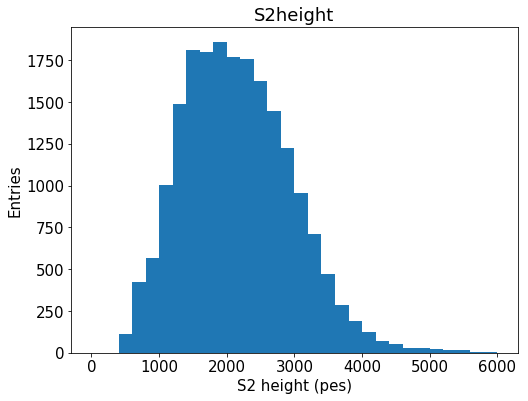

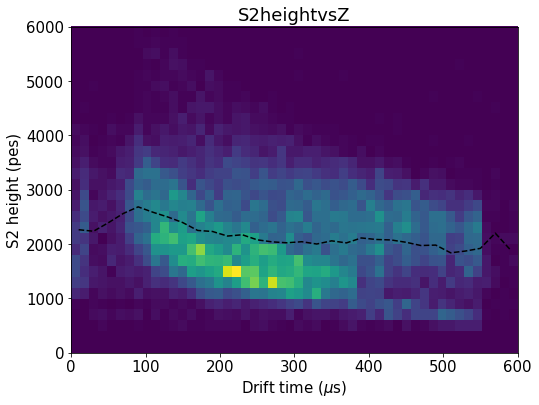

In [57]:
zrange = 0, 600
hrange = 0, 6e3

hist(full.S2h, 30, range=hrange)
labels("S2 height (pes)", "Entries")
save("S2height")

hist2d(full.Z, full.S2h, (50, 30), range=(zrange, hrange))
x, y, _ = fitf.profileX(full.Z, full.S2h, 30, xrange=zrange, yrange=hrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 height (pes)")
save("S2heightvsZ")

# S2 peak to area ratio

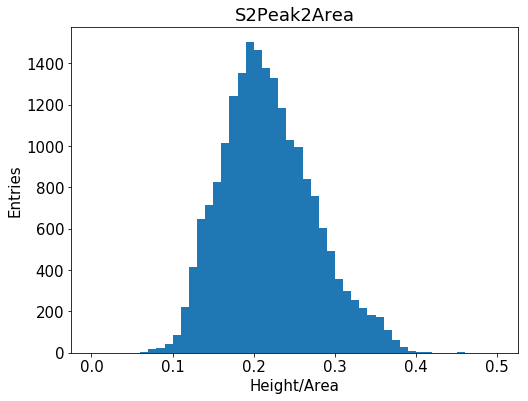

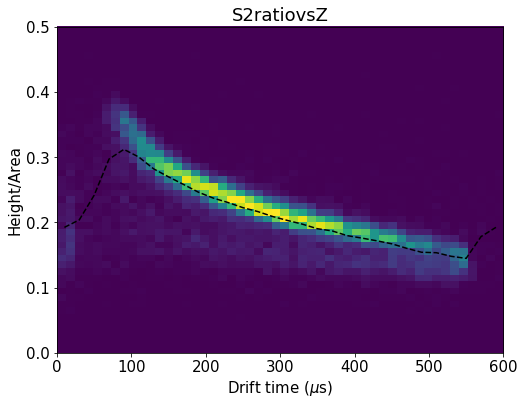

In [58]:
zrange = 0, 600
rrange = 0, 0.5

S2r = full.S2h/full.S2e

hist(S2r, 50, range=rrange)
labels("Height/Area", "Entries")
save("S2Peak2Area")

hist2d(full.Z, S2r, (50, 50), range=(zrange, rrange))
x, y, _ = fitf.profileX(full.Z, S2r, 30, xrange=zrange, yrange=rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "Height/Area")
save("S2ratiovsZ")

# S2 vs S1

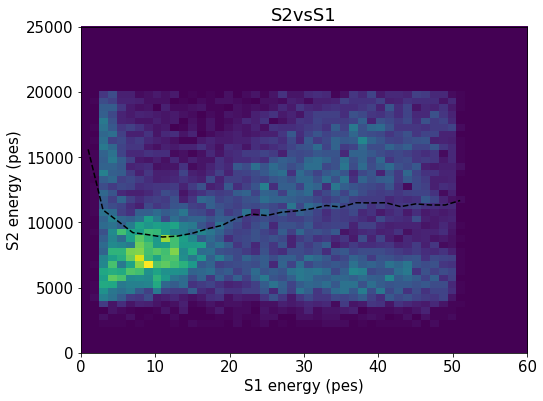

In [63]:
Srange = 0, 60
Erange = 0, 25e3

S = full.S1e
E = full.S2e

hist2d(S, E, (50, 50), range=(Srange, Erange))
x, y, _ = fitf.profileX(S, E, 30, xrange=Srange, yrange=Erange)
plt.plot(x, y, profOpt)

sel = fitf.in_range(S, *Srange) & coref.in_range(E, *Erange)
#c = covariance(S[sel], E[sel])
#print(*c)
labels("S1 energy (pes)", "S2 energy (pes)")
save("S2vsS1")

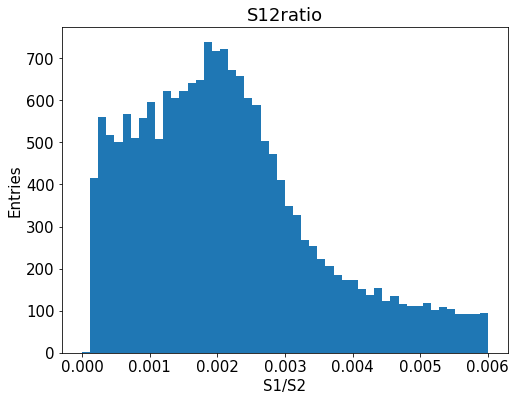

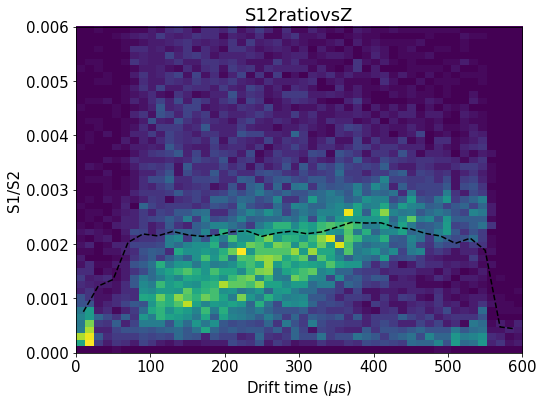

In [64]:
zrange = 0, 600
Rrange = 0, 0.006

S12r = full.S1e/full.S2e

hist(S12r, 50, range=Rrange)
labels("S1/S2", "Entries")
save("S12ratio")

hist2d(full.Z, S12r, (50, 50), range=(zrange, Rrange))
x, y, _ = fitf.profileX(full.Z, S12r, 30, xrange=zrange, yrange=Rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1/S2")
save("S12ratiovsZ")

# Temporary fiducialization

In [65]:
fid = full
fid = fid[fid.R < 100]
print("Ratio:", len(fid)/len(full))
fid.head()

Ratio: 0.1555443801860699


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
2,7,1.495562e+09,0,2,300.0,8.711154,46.523208,152500.0,25.914250,2430.075928,...,655462.5,4,502.9625,502.9625,-49.948125,-30.740957,58.649993,-2.589885,5.045397,4.989958
6,16,1.495562e+09,0,1,150.0,2.660771,12.045676,308650.0,17.984375,1486.855591,...,653462.5,1,344.8125,344.8125,65.000000,45.000000,79.056942,0.605545,0.000000,0.000000
14,64,1.495562e+09,0,1,125.0,1.573113,6.516088,521575.0,9.184000,3048.967529,...,652462.5,7,130.8875,130.8875,-64.805059,50.841533,82.368424,2.476356,6.682097,6.013672
18,74,1.495562e+09,0,2,275.0,5.742419,35.380052,310600.0,18.479688,2410.539551,...,653462.5,7,342.8625,342.8625,-14.558675,-42.222787,44.662274,-1.902837,6.914101,6.862038
19,74,1.495562e+09,1,2,275.0,5.742419,35.380052,310600.0,9.957500,1012.376465,...,688387.5,4,377.7875,377.7875,-42.184270,-5.878227,42.591856,-3.003138,4.521931,7.381030


# S2 energy fiducialized

[ 10412.5114411    -914.37322763]


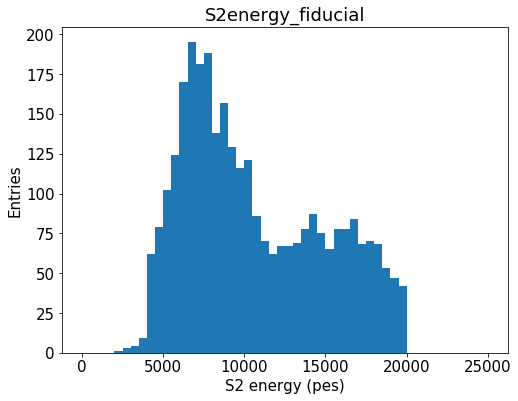

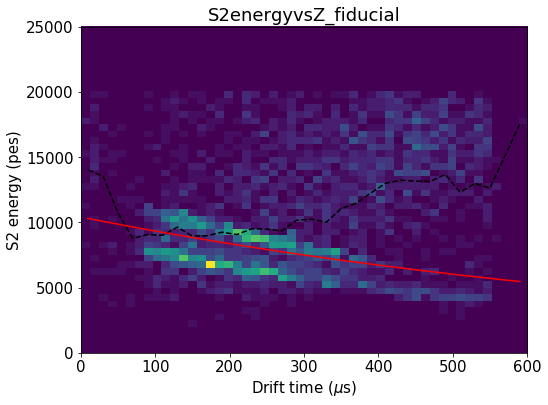

In [66]:
zrange = 0, 600
Erange = 0, 25e3

hist(fid.S2e, 50, range=Erange)
labels("S2 energy (pes)", "Entries")
save("S2energy_fiducial")

hist2d(fid.Z, fid.S2e, (50, 50), range=(zrange, Erange))
x, y, _ = fitf.profileX(fid.Z, fid.S2e, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

f = fitf.fit(fitf.expo, x, y, (1e4, -200), fit_range=(50, 150))
plt.plot(x, f.fn(x), fitOpt)
print(f.values)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyvsZ_fiducial")

zfun  = f.fn
zmin  = np.min(x)
zcorr = lambda z: zfun(zmin)/zfun(z)

# Correction by attachment

[ 461617.00891233    8158.72573876     817.25188977  381968.99201758
   11258.43697804     774.32616574]
[  2.80784250e+04  -2.44265028e+11]


/Users/Gonzalo/github/IC/invisible_cities/core/fit_functions.py:148: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  x, y = xdata[selection], ydata[selection]
/Users/Gonzalo/github/IC/invisible_cities/core/fit_functions.py:152: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  maxval = x_out[i+1])]


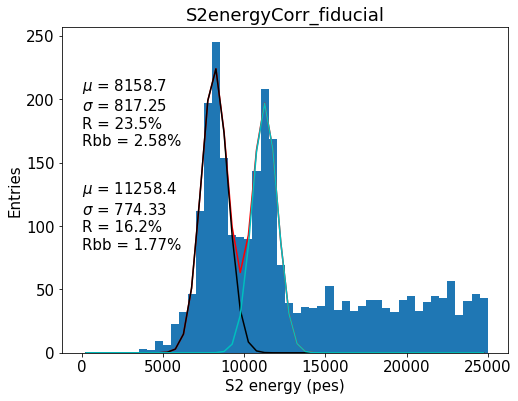

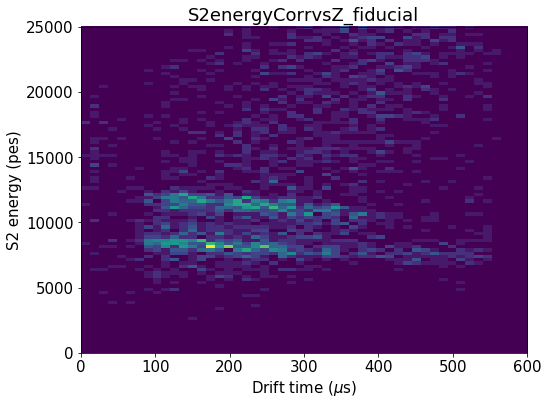

In [82]:
zrange = 0, 600
Erange = 0, 25e3

E = fid.S2e.values * zcorr(fid.Z.values)

y, x, _ = hist(E, 50, range=Erange)

x    = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss(x, *args[:3]) + fitf.gauss(x, *args[3:])
seed = 1e3, 8000, 100, 1e3, 11000, 200
low  =  10, 7000,  50,  10, 10000, 100
upp  = 1e8, 8600, 900, 5e6, 13000, 800
f    = fitf.fit(fun, x, y, seed, fit_range=(5000, 13000), bounds=(low, upp))
print(f.values)


plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], 2*max(y)/3, gausstext(f.values[:3]))
plt.text(Erange[0],   max(y)/3, gausstext(f.values[3:]))


labels("S2 energy (pes)", "Entries")
save("S2energyCorr_fiducial")

hist2d(fid.Z, E, (50, 100), range=(zrange, Erange))
x, y, _ = fitf.profileX(fid.Z, E, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

f = fitf.fit(fitf.expo, x, y, (1e4, -200))
plt.plot(x, f.fn(x), fitOpt)

print(f.values)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyCorrvsZ_fiducial")

# Tracking

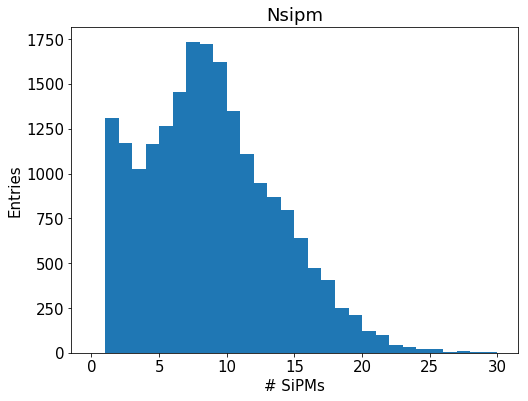

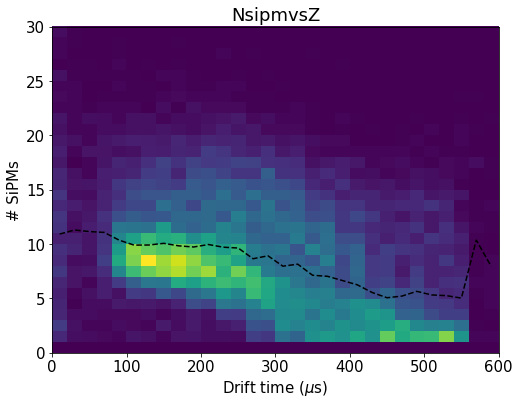

In [86]:
nrange = 0, 30
zrange = 0, 600

hist(full.Nsipm, max(nrange), nrange)
labels("# SiPMs", "Entries")
save("Nsipm")

hist2d(full.Z, full.Nsipm, (30, max(nrange)), range=(zrange, nrange))
x, y, _ = fitf.profileX(full.Z, full.Nsipm, 30, xrange=zrange, yrange=nrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "# SiPMs")
save("NsipmvsZ")


# XR distribution

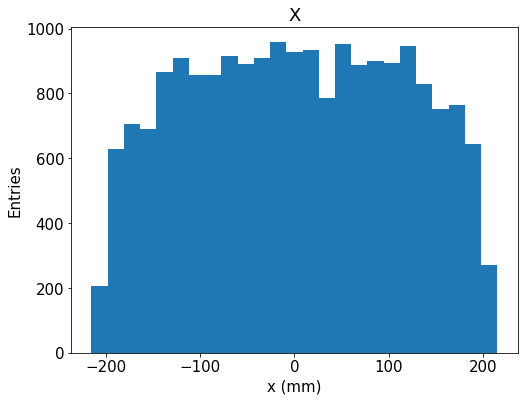

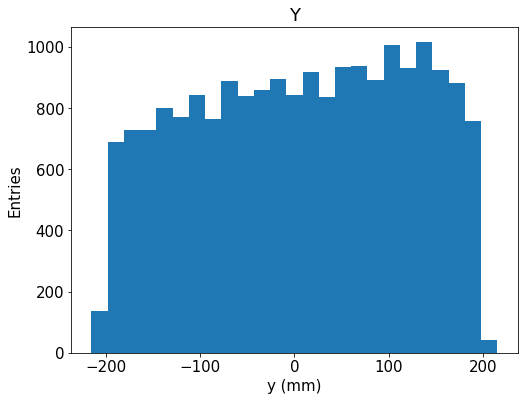

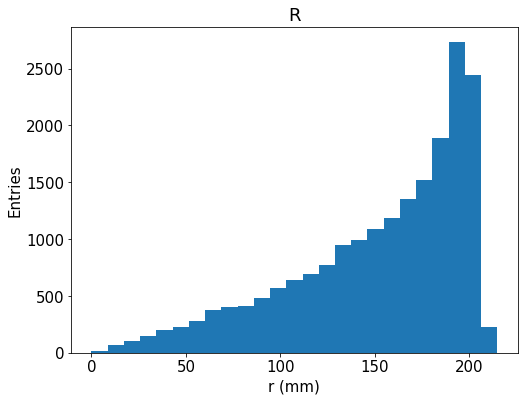

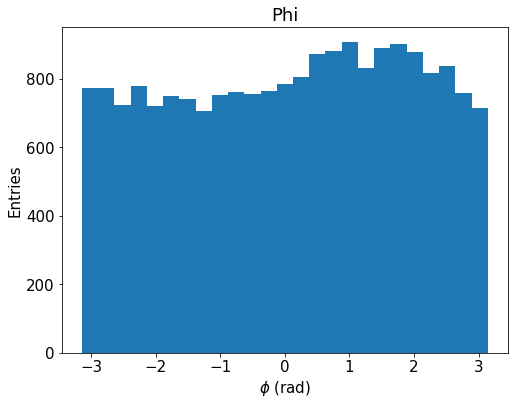

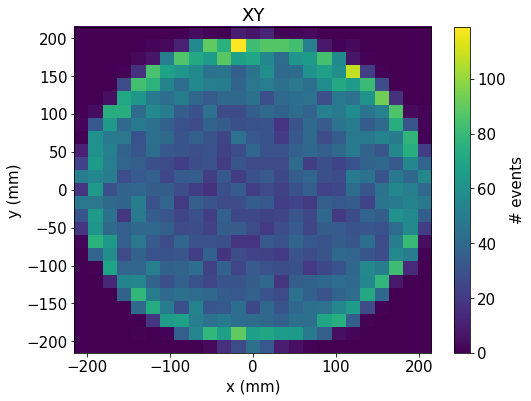

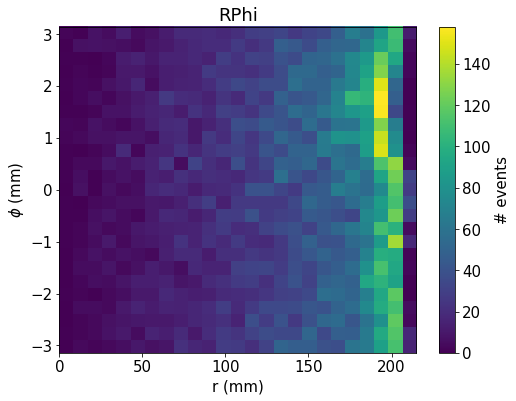

In [88]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi

hist(full.X, 25, range=xrange)
labels("x (mm)", "Entries")
save("X")

hist(full.Y, 25, range=yrange)
labels("y (mm)", "Entries")
save("Y")

hist(full.R, 25, range=rrange)
labels("r (mm)", "Entries")
save("R")

hist(full.Phi, 25, range=prange)
labels("$\phi$ (rad)", "Entries")
save("Phi")

nevts, xs, ys, _ = \
hist2d(full.X, full.Y, (25, 25), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")
save("XY")

hist2d(full.R, full.Phi, (25, 25), range=(rrange, prange))
plt.colorbar().set_label("# events")
labels("r (mm)", "$\phi$ (mm)")
save("RPhi")

# Tracking charge

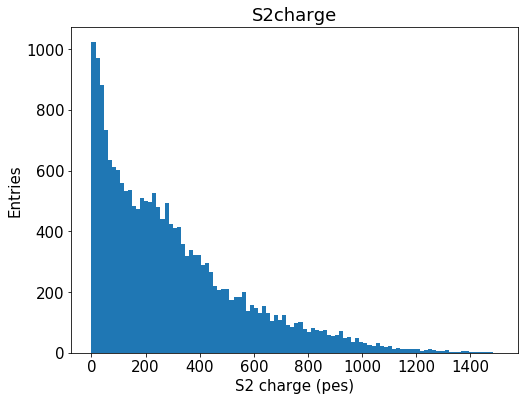

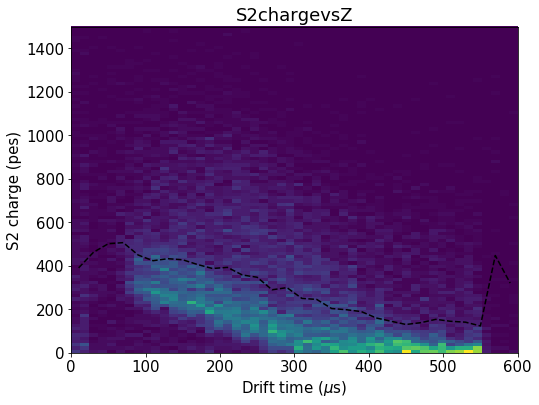

In [92]:
zrange = 0,  600
Qrange = 0, 1500

hist(full.S2q, 100, range=Qrange)
labels("S2 charge (pes)", "Entries")
save("S2charge")

hist2d(full.Z, full.S2q, (50, 100), range=(zrange, Qrange))
x, y, _ = fitf.profileX(full.Z, full.S2q, 30, xrange=zrange, yrange=Qrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 charge (pes)")
save("S2chargevsZ")

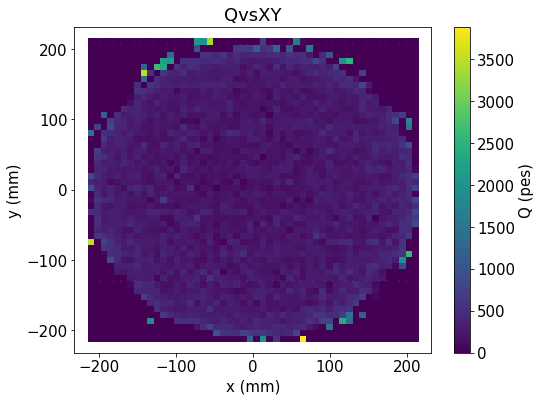

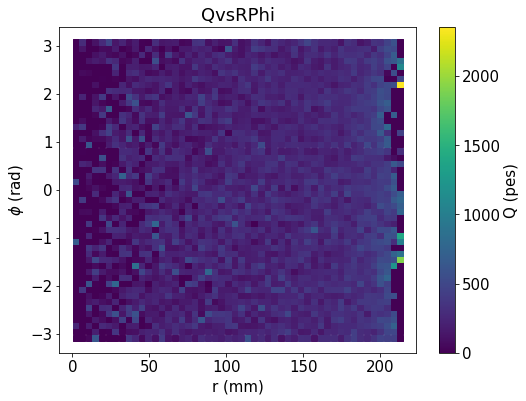

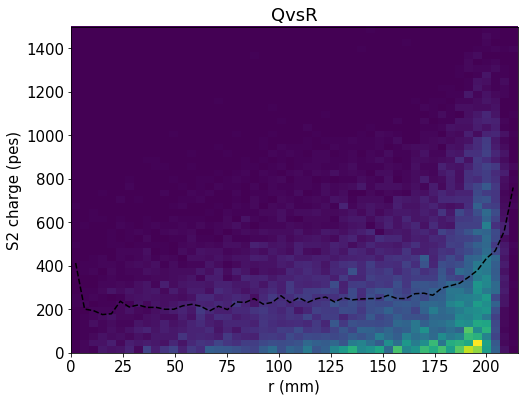

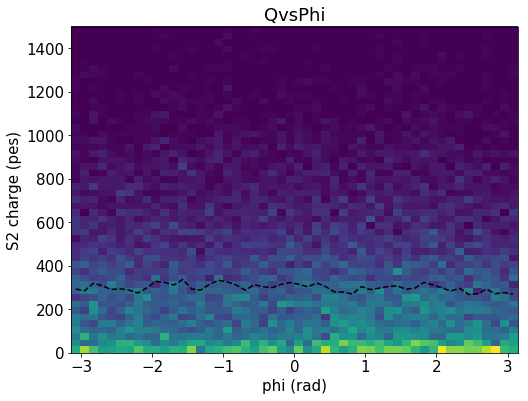

In [94]:
xrange = -215,  215
yrange = -215,  215
rrange =    0,  215
prange = - pi,   pi
Qrange =    0, 1500

_, _, cb = profile_and_scatter(full.X, full.Y, full.S2q, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("Q (pes)")
labels("x (mm)", "y (mm)")
save("QvsXY")

_, _, cb = profile_and_scatter(full.R, full.Phi, full.S2q, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("Q (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("QvsRPhi")

hist2d(full.R, full.S2q, (50, 50), range=(rrange, Qrange))
x, y, _ = fitf.profileX(full.R, full.S2q, 50, xrange=rrange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 charge (pes)")
save("QvsR")

hist2d(full.Phi, full.S2q, (50, 50), range=(prange, Qrange))
x, y, _ = fitf.profileX(full.Phi, full.S2q, 50, xrange=prange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 charge (pes)")
save("QvsPhi")


# Energy vs position

17777.7439942


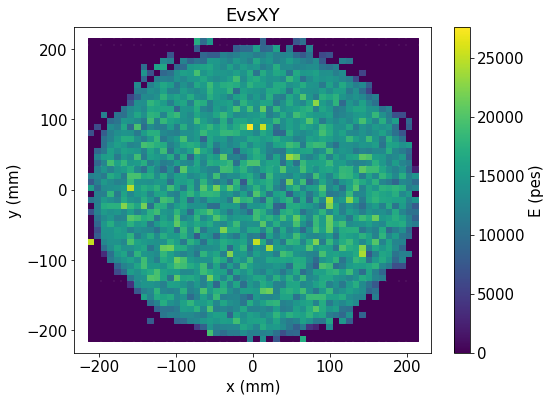

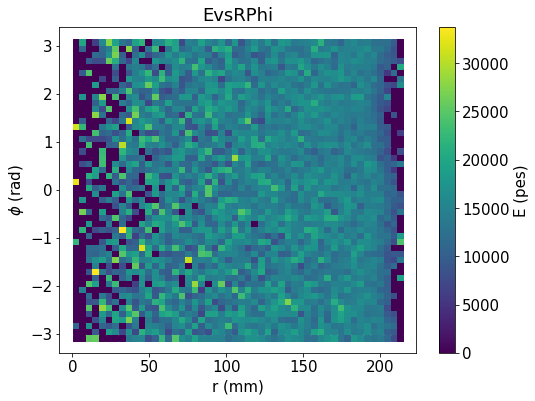

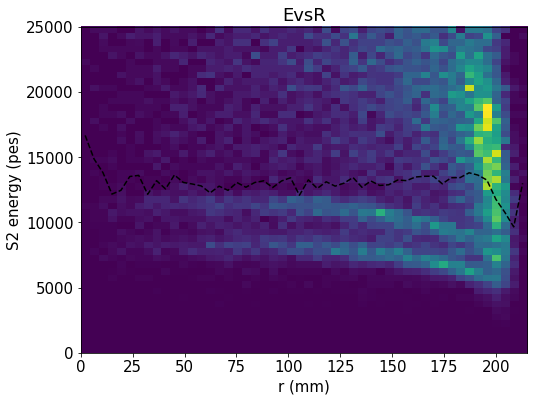

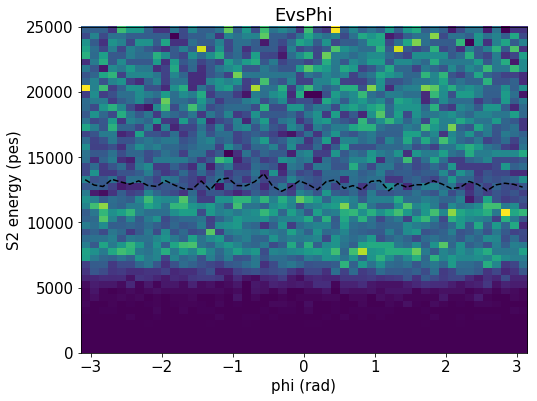

In [95]:
xrange = -215,  215
yrange = -215,  215
rrange =    0,  215
prange = - pi,   pi
Erange =    0, 25e3

E = full.S2e * zcorr(full.Z)

pf, _, cb = profile_and_scatter(full.X, full.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(full.R, full.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(full.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(full.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(full.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(full.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")

def get_xycorr(xs, ys, es, eref=None):
    if eref is None:
        eref = es[es.shape[0]//2, es.shape[1]//2]
    xs   = xs.reshape(xs.size, 1)
    ys   = ys.reshape(ys.size, 1)
    print(eref)
    def xycorr(x, y):
        x_closest = np.apply_along_axis(np.argmin, 0, abs(x-xs))
        y_closest = np.apply_along_axis(np.argmin, 0, abs(y-ys))
        e = es[x_closest, y_closest]
        e[e<1e3] = eref
        return eref/ e
    return xycorr
xycorr = get_xycorr(*pf[:-1])


# Correction by attachment and position

[  1.02746866e+06   8.08874630e+03   8.00000000e+02   4.99999998e+05
   9.20000000e+03   5.04299975e+02]


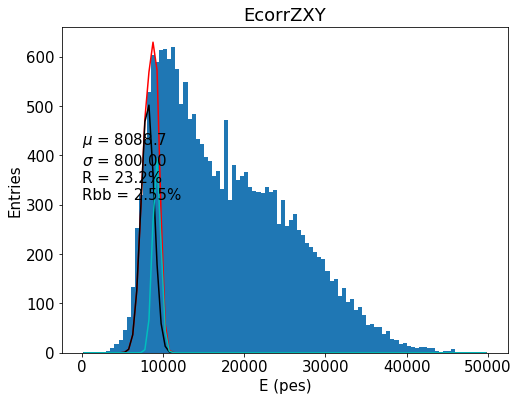

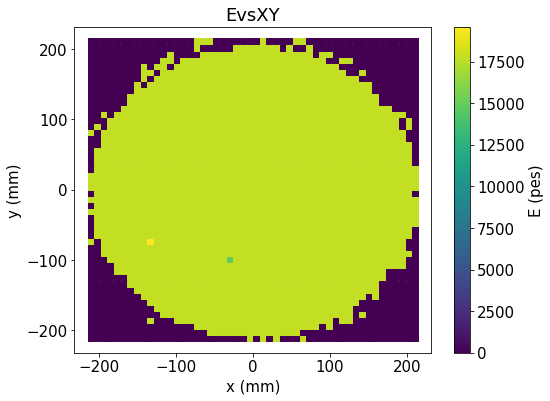

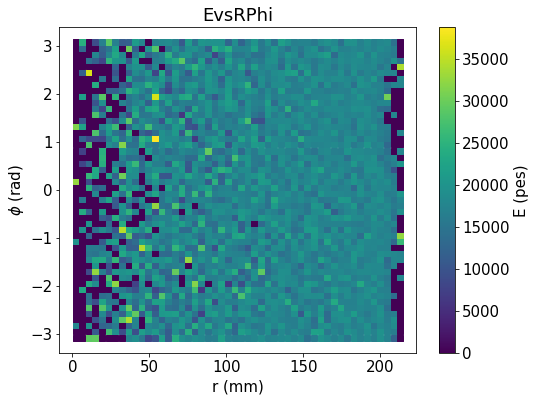

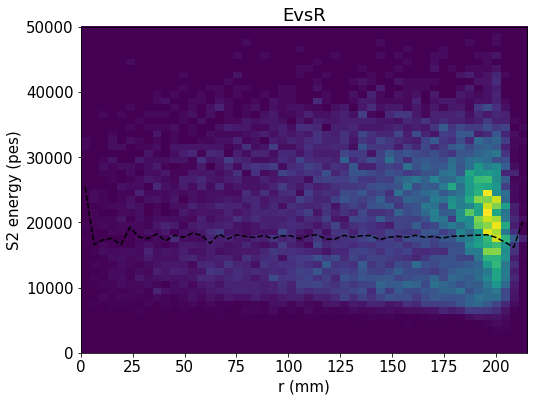

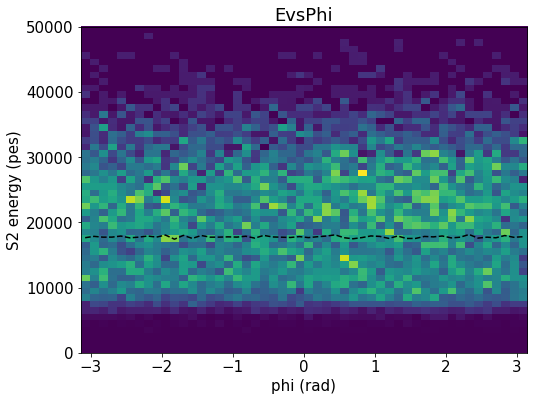

In [97]:
xrange = -215,  215
yrange = -215,  215
rrange =    0,  215
prange = - pi,   pi
Erange =    0, 50e3

E  = full.S2e * zcorr(full.Z) * xycorr(full.X.values, full.Y.values)

y, x, _ = hist(E, 100, Erange)

x    = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss(x, *args[:3]) + fitf.gauss(x, *args[3:])
seed = 1e3, 7500, 100, 1e3, 9000, 200
low  =  10, 7000,  50,  10, 8000, 100
upp  = 5e6, 8200, 800, 5e5, 9200, 800
f    = fitf.fit(fun, x, y, seed, fit_range=(6000, 10000), bounds=(low, upp))
print(f.values)

plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], max(y)/2, gausstext(f.values[:3]))

labels("E (pes)", "Entries")
save("EcorrZXY")

_, _, cb = profile_and_scatter(full.X, full.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(full.R, full.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(full.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(full.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(full.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(full.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")


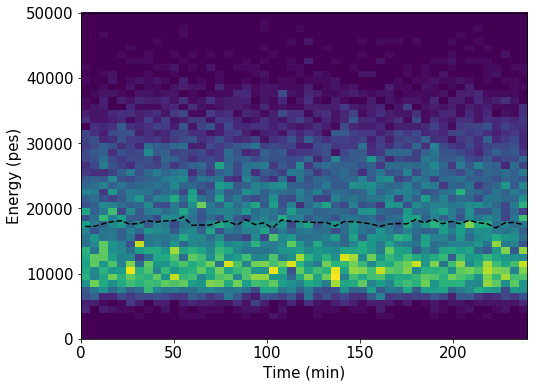

In [98]:
E = full.S2e * zcorr(full.Z) * xycorr(full.X.values, full.Y.values)
T = (full.time - np.min(full.time))/60

Erange = 0, 50e3
Trange = 0, np.max(T)

hist2d(T, E, (50, 50), range=(Trange, Erange))

x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

labels("Time (min)", "Energy (pes)")

def get_timecorr(T, E):
    eref = np.max(E)
    def timecorr(t):
        dt = np.abs(t[:, np.newaxis]-T)
        return eref / E[np.apply_along_axis(np.argmin, 1, dt)]
    return timecorr
tcorr = get_timecorr(x, y)

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

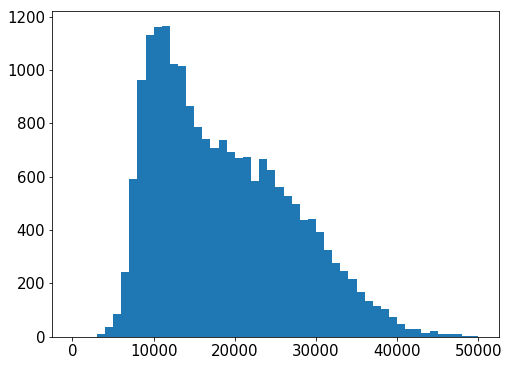

In [99]:
T = (full.time - np.min(full.time))/60
E = full.S2e * zcorr(full.Z) * xycorr(full.X.values, full.Y.values) * tcorr(T)

Trange = 0, np.max(T)
Erange = 0, 50e3

y, x, _ = hist(E, 50, Erange)

x = x[:-1] + np.diff(x) * 0.5
fun  = lambda x, *args: fitf.gauss(x, *args[:3]) + fitf.gauss(x, *args[3:])
seed = 1e3, 7500, 100, 1e3, 9000, 200
low  =  10, 7000,  50,  10, 8000, 100
upp  = 5e6, 8200, 800, 5e5, 9200, 800
f    = fitf.fit(fun, x, y, seed, fit_range=(6000, 10000), bounds=(low, upp))
print(f.values)

plt.plot(x, f.fn(x), fitOpt)
plt.plot(x, fitf.gauss(x, *f.values[:3]), XR1Opt)
plt.plot(x, fitf.gauss(x, *f.values[3:]), XR2Opt)
plt.text(Erange[0], max(y)/2, gausstext(f.values[:3]))

labels("E (pes)", "Entries")
save("EcorrZXYT")

hist2d(T, E, (50, 50), range=(Trange, Erange))
x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

labels("Time (min)", "Energy (pes)")
